In [ ]:
#Load the data
#import drive
from google.colab import drive                                                                                                                                                                                  
drive.mount('/content/drive') 

Mounted at /content/drive


# STI

In [ ]:
#Importing Data and Inspection
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Business Decision Research/Input/BusinessDecRes_STI.csv',sep=',')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   Customer_no  Item_no  ... AVG_Transaction_Amount Count_Transaction
0       100001   100473  ...                24091.0                 1
1       100001   104022  ...                 6000.0                 1
2       100001   107893  ...                10909.0                 1
3       100001   107492  ...                 8545.0                 1
4       100001   109660  ...                 4545.0                 1

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117842 entries, 0 to 117841
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_no             117842 non-null  int64  
 1   Item_no                 117842 non-null  int64  
 2   Description             117842 non-null  object 
 3   Dept                    117842 non-null  object 
 4   First_Transaction       117842 non-null  object 
 5   Last_Transaction        117842 

In [ ]:
df.head()

,Customer_no,Item_no,Description,Dept,First_Transaction,Last_Transaction,AVG_Transaction_Amount,Count_Transaction
0,100001,100473,FOX LEM BANTENG KW 1,PDG,18-05-16,18-05-16,24091.0,1
1,100001,104022,JASON 348-049 OBENG 8IN PLUS,PDG,09-05-16,09-05-16,6000.0,1
2,100001,107893,(NON AKTIF),PDG,09-05-16,09-05-16,10909.0,1
3,100001,107492,TACO EDGING 22MM X 2MM 205,PDG,26-04-17,26-04-17,8545.0,1
4,100001,109660,KLASSEN CH.1027 E.SD HT BKK,PDG,12-11-16,12-11-16,4545.0,1


In [ ]:
df.dtypes

Customer_no                 int64
Item_no                     int64
Description                object
Dept                       object
First_Transaction          object
Last_Transaction           object
AVG_Transaction_Amount    float64
Count_Transaction           int64
dtype: object

In [ ]:
#df['Customer_no'] =df['Customer_no'].apply(lambda x:str(x))

In [ ]:
#df['Last_Transaction'] =df['Last_Transaction'].apply(lambda x:str(x))

In [ ]:
df.head()

,Customer_no,Item_no,Description,Dept,First_Transaction,Last_Transaction,AVG_Transaction_Amount,Count_Transaction
0,100001,100473,FOX LEM BANTENG KW 1,PDG,18-05-16,18-05-16,24091.0,1
1,100001,104022,JASON 348-049 OBENG 8IN PLUS,PDG,09-05-16,09-05-16,6000.0,1
2,100001,107893,(NON AKTIF),PDG,09-05-16,09-05-16,10909.0,1
3,100001,107492,TACO EDGING 22MM X 2MM 205,PDG,26-04-17,26-04-17,8545.0,1
4,100001,109660,KLASSEN CH.1027 E.SD HT BKK,PDG,12-11-16,12-11-16,4545.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117842 entries, 0 to 117841
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_no             117842 non-null  int64  
 1   Item_no                 117842 non-null  int64  
 2   Description             117842 non-null  object 
 3   Dept                    117842 non-null  object 
 4   First_Transaction       117842 non-null  object 
 5   Last_Transaction        117842 non-null  object 
 6   AVG_Transaction_Amount  117842 non-null  float64
 7   Count_Transaction       117842 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 7.2+ MB


CHURN CUSTOMERS
Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah

1. transaksi paling terakhir kapan dilakukan
2. klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.

Setelah itu cetak lima data teratas dan informasi dataset.

In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '30-06-2020', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '30-06-2020', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

31-12-19
Lima data teratas:
   Customer_no  Item_no  ... Count_Transaction is_churn
0       100001   100473  ...                 1     True
1       100001   104022  ...                 1     True
2       100001   107893  ...                 1     True
3       100001   107492  ...                 1     True
4       100001   109660  ...                 1     True

[5 rows x 9 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117842 entries, 0 to 117841
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_no             117842 non-null  int64  
 1   Item_no                 117842 non-null  int64  
 2   Description             117842 non-null  object 
 3   Dept                    117842 non-null  object 
 4   First_Transaction       117842 non-null  object 
 5   Last_Transaction        117842 non-null  object 
 6   AVG_Transaction_Amount  117842 non-null  float64
 7 

In [ ]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction'])
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction'])

print('Lima data teratas:')
print(df.head())

Lima data teratas:
   Customer_no  Item_no  ... Count_Transaction is_churn
0       100001   100473  ...                 1     True
1       100001   104022  ...                 1     True
2       100001   107893  ...                 1     True
3       100001   107492  ...                 1     True
4       100001   109660  ...                 1     True

[5 rows x 9 columns]


In [ ]:
# Hapus kolom-kolom yang tidak diperlukan
#del df['Item_no']
# Cetak lima data teratas
#print(df.head())

   Customer_no                   Description  ... Count_Transaction is_churn
0       100001          FOX LEM BANTENG KW 1  ...                 1     True
1       100001  JASON 348-049 OBENG 8IN PLUS  ...                 1     True
2       100001                   (NON AKTIF)  ...                 1     True
3       100001    TACO EDGING 22MM X 2MM 205  ...                 1     True
4       100001   KLASSEN CH.1027 E.SD HT BKK  ...                 1     True

[5 rows x 8 columns]


Customer Acquisition by Year

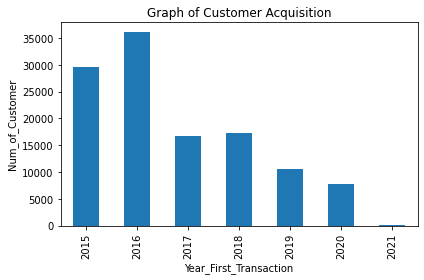

In [ ]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year

# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df_year = df.groupby(['Year_First_Transaction'])['Customer_no'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Transaction by Year

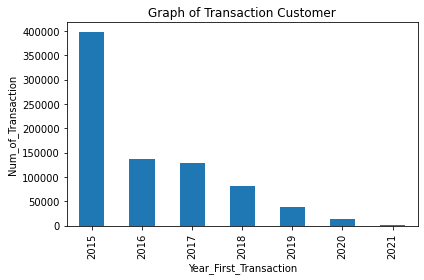

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

Average Transaction Amount by YEAR

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#plt.clf()
#sns.pointplot(data = df.groupby(['Description', 'Year_First_Transaction']).mean().reset_index(),
#			  x='Year_First_Transaction',
#			  y='AVG_Transaction_Amount',
#			  hue='Description')
#plt.tight_layout()
#plt.show()


<Figure size 432x288 with 0 Axes>

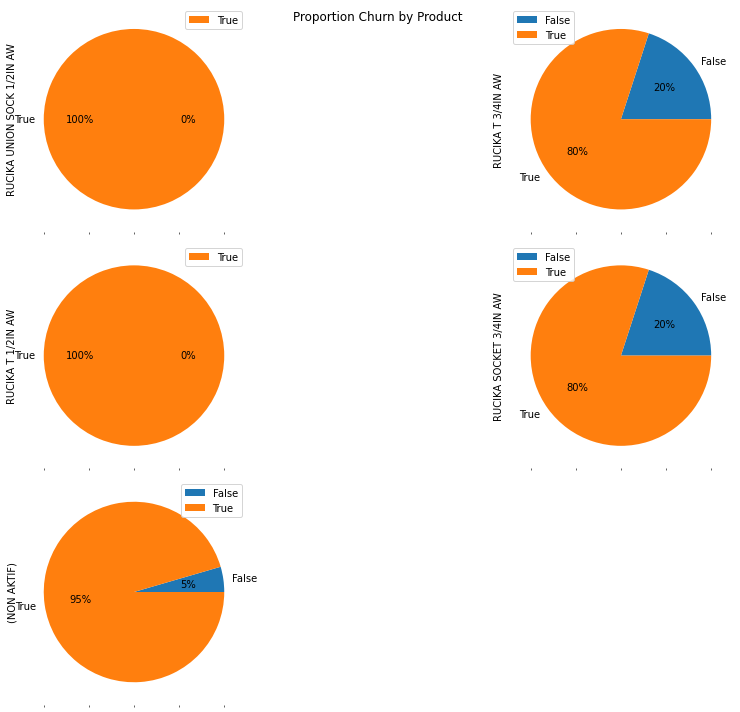

In [ ]:
import matplotlib.pyplot as plt
plt.clf()

# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
						columns='Description',
						values='Customer_no',
						aggfunc='count',
						fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).tail(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
				figsize=(15, 10),
				layout=(-1, 2),
				autopct='%1.0f%%',
				title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

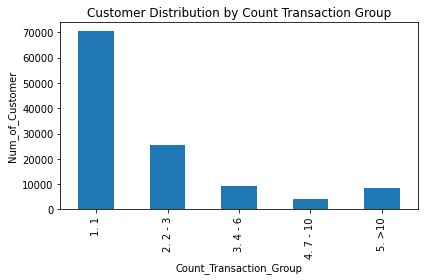

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1. 1'
	elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
		val ='2. 2 - 3'
	elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
		val ='3. 4 - 6'
	elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
		val ='4. 7 - 10'
	else:
		val ='5. >10'
	return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)
df_year = df.groupby(['Count_Transaction_Group'])['Customer_no'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

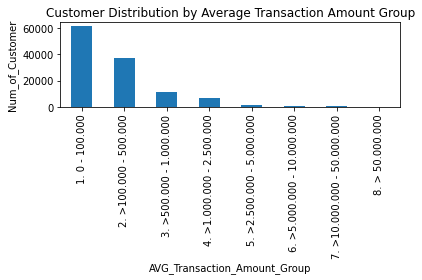

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
	if (row['AVG_Transaction_Amount'] >= 0 and row['AVG_Transaction_Amount'] <=100000):
		val ='1. 0 - 100.000'
	elif (row['AVG_Transaction_Amount'] > 100000 and row['AVG_Transaction_Amount'] <= 500000):
		val ='2. >100.000 - 500.000'
	elif (row['AVG_Transaction_Amount'] > 500000 and row['AVG_Transaction_Amount'] <= 1000000):
		val ='3. >500.000 - 1.000.000'
	elif (row['AVG_Transaction_Amount'] > 1000000 and row['AVG_Transaction_Amount'] <= 2500000):
		val ='4. >1.000.000 - 2.500.000'
	elif (row['AVG_Transaction_Amount'] > 2500000 and row['AVG_Transaction_Amount'] <= 5000000):
		val ='5. >2.500.000 - 5.000.000'
	elif (row['AVG_Transaction_Amount'] > 5000000 and row['AVG_Transaction_Amount'] <= 10000000):
		val ='6. >5.000.000 - 10.000.000'
	elif (row['AVG_Transaction_Amount'] > 10000000 and row['AVG_Transaction_Amount'] <= 50000000):
		val ='7. >10.000.000 - 50.000.000'
	else:
		val ='8. > 50.000.000'
	return val

# Tambahkan kolom baru
df['AVG_Transaction_Amount_Group'] = df.apply(f, axis=1)
df_year = df.groupby(['AVG_Transaction_Amount_Group'])['Customer_no'].count()
df_year.plot(x='AVG_Transaction_Amount_Group', y='Customer_no',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('AVG_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()


In [ ]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Customer_no','Item_no', 'AVG_Transaction_Amount', 'Count_Transaction','Year_Diff']

# Features variable
X = df[feature_columns]  

# Target variable
print(df[df['is_churn'].isnull()])
df['is_churn'] = pd.to_numeric(df['is_churn'], errors='coerce')
df = df.dropna(subset=['is_churn'])
df['is_churn'] = df['is_churn'].astype(int)
y = df['is_churn']

Empty DataFrame
Columns: [Customer_no, Item_no, Description, Dept, First_Transaction, Last_Transaction, AVG_Transaction_Amount, Count_Transaction, is_churn, Year_First_Transaction, Year_Last_Transaction, Count_Transaction_Group, AVG_Transaction_Amount_Group, Year_Diff]
Index: []


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(y_test)

111959    1
72857     1
77024     1
42063     1
109239    1
         ..
20273     1
3681      1
100655    1
21541     1
63889     1
Name: is_churn, Length: 35353, dtype: int64


In [ ]:
print(X_test)

        Customer_no  Item_no  ...  Count_Transaction  Year_Diff
111959       102792   109660  ...                  3          0
72857        101989   103161  ...                 15          3
77024        102086   102508  ...                  1          0
42063        100637   102914  ...                  1          0
109239       101595   109743  ...                  1          0
...             ...      ...  ...                ...        ...
20273        100235   119879  ...                  6          0
3681         100065   102791  ...                  1          0
100655       100235   107370  ...                  2          0
21541        100248   112149  ...                  1          0
63889        101686   107081  ...                  1          0

[35353 rows x 5 columns]


In [ ]:
#Train, predict dan evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
log_model=logreg.fit(X_train, y_train)

# Predict model
y_train_pred = log_model.predict(X_train)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_train,y_train_pred))
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
    0      1
0  1   3479
1  4  79005


<Figure size 432x288 with 0 Axes>

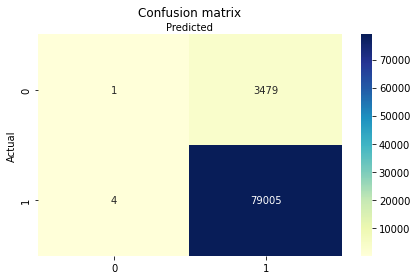

In [ ]:
#y_pred = logreg.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
print(y_train_pred)

[1 1 1 ... 1 1 1]


In [ ]:
y_test_pred = log_model.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_test,y_test_pred))
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
    0      1
0  0   1461
1  2  33890


In [ ]:
print(y_test_pred)

[1 1 1 ... 1 1 1]


<Figure size 432x288 with 0 Axes>

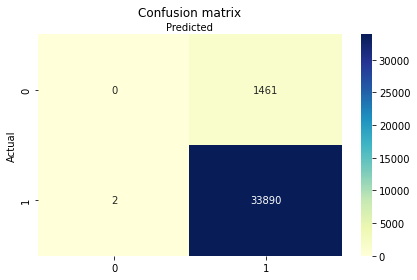

In [ ]:
#y_pred = logreg.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred, average='micro'))
print('Recall :', recall_score(y_test, y_test_pred, average='micro'))

Accuracy : 0.9586173733487964
Precision: 0.9586173733487964
Recall : 0.9586173733487964


In [ ]:
#Output CSV
final_train = pd.DataFrame()
final_train = X_train.assign()


In [ ]:
print(final_train.head())
print(final_train.shape)

        Customer_no  Item_no  ...  Count_Transaction  Year_Diff
36237        100490   106463  ...                  1          0
18263        100235   108008  ...                 13          0
102068       100266   103082  ...                 14          1
28080        100331   109698  ...                  1          0
114186       103166   111003  ...                  1          0

[5 rows x 5 columns]
(82489, 5)


In [ ]:
output = final_train.assign(churn_pred = y_train_pred)

In [ ]:
output.head(50)

,Customer_no,Item_no,AVG_Transaction_Amount,Count_Transaction,Year_Diff,churn_pred
36237,100490,106463,61364.00000,1,0,1
18263,100235,108008,39860.00000,13,0,1
102068,100266,103082,679363.85710,14,1,1
28080,100331,109698,106818.00000,1,0,1
114186,103166,111003,505909.00000,1,0,1
55265,100894,100659,65455.00000,1,0,1
106819,101188,104214,286944.00000,1,0,1
65560,101721,101150,5182.00000,1,0,1
76711,102078,101723,19091.00000,1,0,1
93246,103565,111594,19772.75000,4,1,1


In [ ]:
#output.to_csv('/content/drive/MyDrive/Business Decision Research/output_train_STI.csv')

In [ ]:
#OUTPUT TEST CSV
final_test = pd.DataFrame()
final_test = X_test.assign()

In [ ]:
output_test = final_test.assign(churn_pred = y_test_pred)

In [ ]:
print(final_test.head())
print(final_test.shape)

        Customer_no  Item_no  ...  Count_Transaction  Year_Diff
111959       102792   109660  ...                  3          0
72857        101989   103161  ...                 15          3
77024        102086   102508  ...                  1          0
42063        100637   102914  ...                  1          0
109239       101595   109743  ...                  1          0

[5 rows x 5 columns]
(35353, 5)


In [ ]:
output_test.head()

,Customer_no,Item_no,AVG_Transaction_Amount,Count_Transaction,Year_Diff,churn_pred
111959,102792,109660,372727.3333,3,0,1
72857,101989,103161,693546.9333,15,3,1
77024,102086,102508,3118.0000,1,0,1
42063,100637,102914,9455.0000,1,0,1
109239,101595,109743,20000.0000,1,0,1


In [ ]:
frames = [output, output_test]

In [ ]:
result = pd.concat(frames).drop_duplicates().reset_index(drop=True)

In [ ]:
result.head()

,Customer_no,Item_no,AVG_Transaction_Amount,Count_Transaction,Year_Diff,churn_pred
0,100490,106463,61364.0000,1,0,1
1,100235,108008,39860.0000,13,0,1
2,100266,103082,679363.8571,14,1,1
3,100331,109698,106818.0000,1,0,1
4,103166,111003,505909.0000,1,0,1


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117841 entries, 0 to 117840
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_no             117841 non-null  int64  
 1   Item_no                 117841 non-null  int64  
 2   AVG_Transaction_Amount  117841 non-null  float64
 3   Count_Transaction       117841 non-null  int64  
 4   Year_Diff               117841 non-null  int64  
 5   churn_pred              117841 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 5.4 MB


In [ ]:
result.to_csv('/content/drive/MyDrive/Business Decision Research/output_sti.csv')

# USD

In [ ]:
#Importing Data and Inspection
import pandas as pd

df_usd = pd.read_csv('/content/drive/My Drive/Business Decision Research/Input/BusinessDecRes_USD.csv',sep=',')

print('Lima data teratas:')
print(df_usd.head())

print('\nInfo dataset:')
print(df_usd.info())

Lima data teratas:
   Customer_no  Item_no  ... AVG_Transaction_Amount Count_Transaction
0       100002   100015  ...              616681.75                 4
1       100002   100029  ...             1322727.00                 1
2       100002   100036  ...              276545.00                 1
3       100002   100040  ...              210182.00                 2
4       100002   100047  ...              333454.50                 2

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32170 entries, 0 to 32169
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_no             32170 non-null  int64  
 1   Item_no                 32170 non-null  int64  
 2   Description             32170 non-null  object 
 3   Dept                    32170 non-null  object 
 4   First_Transaction       32170 non-null  object 
 5   Last_Transaction        32170 non-null  

In [ ]:
df_usd.head()

,Customer_no,Item_no,Description,Dept,First_Transaction,Last_Transaction,AVG_Transaction_Amount,Count_Transaction
0,100002,100015,IKAD GE 7415,PLM,16-02-2015,20-01-2020,616681.75,4
1,100002,100029,(NON AKTIF),PLM,28-11-2014,28-11-2014,1322727.00,1
2,100002,100036,IKAD SX 1459,PLM,10-11-2014,10-11-2014,276545.00,1
3,100002,100040,(NON AKTIF),PLM,10-11-2014,26-11-2014,210182.00,2
4,100002,100047,IKAD SX 6446 KW E,PLM,15-05-2015,18-05-2015,333454.50,2


In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df_usd['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
# True = churn, False = tidak churn
df_usd.loc[df_usd['Last_Transaction'] <= '30-06-2020', 'is_churn'] = True
df_usd.loc[df_usd['Last_Transaction'] > '30-06-2020', 'is_churn'] = False

print('Lima data teratas:')
print(df_usd.head())

print('\nInfo dataset:')
print(df_usd.info())

31-12-2019
Lima data teratas:
   Customer_no  Item_no  ... Count_Transaction is_churn
0       100002   100015  ...                 4     True
1       100002   100029  ...                 1     True
2       100002   100036  ...                 1     True
3       100002   100040  ...                 2     True
4       100002   100047  ...                 2     True

[5 rows x 9 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32170 entries, 0 to 32169
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_no             32170 non-null  int64  
 1   Item_no                 32170 non-null  int64  
 2   Description             32170 non-null  object 
 3   Dept                    32170 non-null  object 
 4   First_Transaction       32170 non-null  object 
 5   Last_Transaction        32170 non-null  object 
 6   AVG_Transaction_Amount  32170 non-null  float64
 7   Count_T

In [ ]:
# Kolom First_Transaction
df_usd['First_Transaction'] = pd.to_datetime(df_usd['First_Transaction'])
# Kolom Last_Transaction
df_usd['Last_Transaction'] = pd.to_datetime(df_usd['Last_Transaction'])

print('Lima data teratas:')
print(df_usd.head())

Lima data teratas:
   Customer_no  Item_no  ... Count_Transaction is_churn
0       100002   100015  ...                 4     True
1       100002   100029  ...                 1     True
2       100002   100036  ...                 1     True
3       100002   100040  ...                 2     True
4       100002   100047  ...                 2     True

[5 rows x 9 columns]


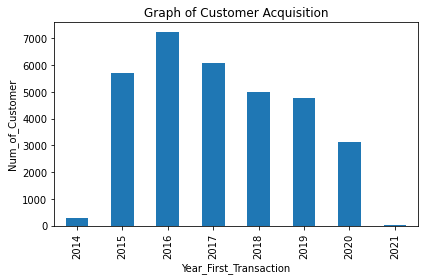

In [ ]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df_usd['Year_First_Transaction'] = df_usd['First_Transaction'].dt.year

# Kolom tahun transaksi terakhir
df_usd['Year_Last_Transaction'] = df_usd['Last_Transaction'].dt.year
df_year = df_usd.groupby(['Year_First_Transaction'])['Customer_no'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

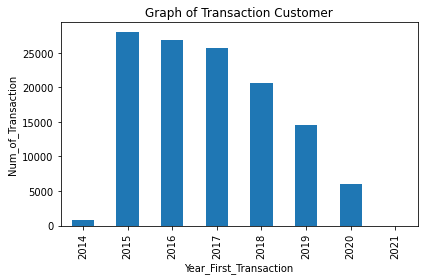

In [ ]:
#Transaction by Year
import matplotlib.pyplot as plt
plt.clf()
df_year = df_usd.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

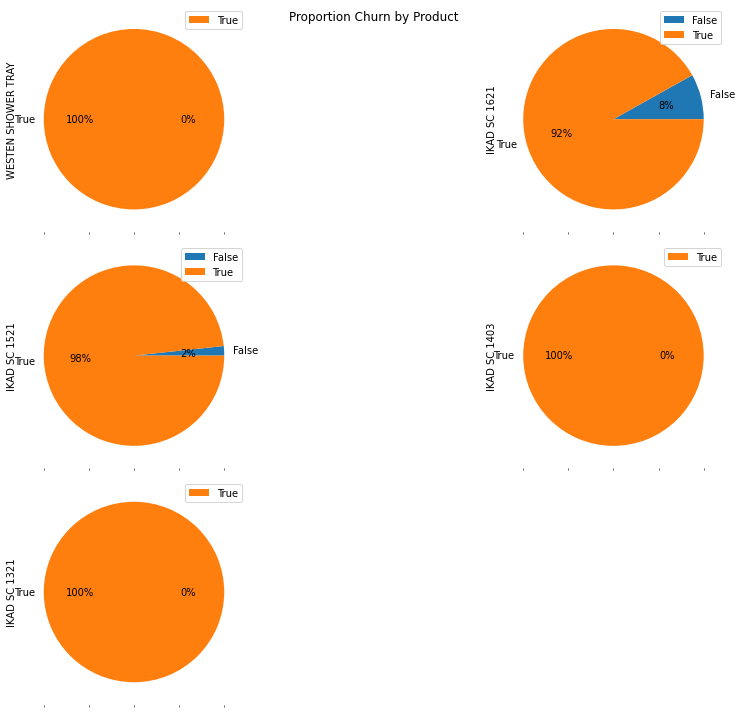

In [ ]:
import matplotlib.pyplot as plt
plt.clf()

# Melakukan pivot data
df_piv = df_usd.pivot_table(index='is_churn',
						columns='Description',
						values='Customer_no',
						aggfunc='count',
						fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
				figsize=(15, 10),
				layout=(-1, 2),
				autopct='%1.0f%%',
				title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

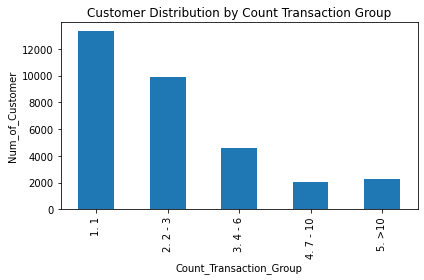

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1. 1'
	elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
		val ='2. 2 - 3'
	elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
		val ='3. 4 - 6'
	elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
		val ='4. 7 - 10'
	else:
		val ='5. >10'
	return val
# Tambahkan kolom baru
df_usd['Count_Transaction_Group'] = df_usd.apply(func, axis=1)
df_year = df_usd.groupby(['Count_Transaction_Group'])['Customer_no'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

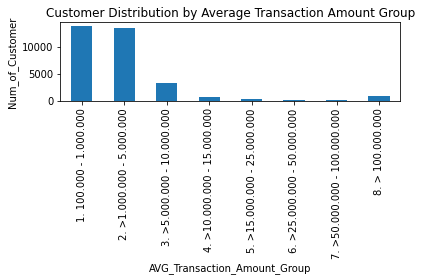

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
	if (row['AVG_Transaction_Amount'] >= 100000 and row['AVG_Transaction_Amount'] <=1000000):
		val ='1. 100.000 - 1.000.000'
	elif (row['AVG_Transaction_Amount'] >1000000 and row['AVG_Transaction_Amount'] <= 5000000):
		val ='2. >1.000.000 - 5.000.000'
	elif (row['AVG_Transaction_Amount'] >5000000 and row['AVG_Transaction_Amount'] <= 10000000):
		val ='3. >5.000.000 - 10.000.000'
	elif (row['AVG_Transaction_Amount'] >10000000 and row['AVG_Transaction_Amount'] <= 15000000):
		val ='4. >10.000.000 - 15.000.000'
	elif (row['AVG_Transaction_Amount'] >15000000 and row['AVG_Transaction_Amount'] <= 25000000):
		val ='5. >15.000.000 - 25.000.000'
	elif (row['AVG_Transaction_Amount'] >25000000 and row['AVG_Transaction_Amount'] <= 50000000):
		val ='6. >25.000.000 - 50.000.000'
	elif (row['AVG_Transaction_Amount'] >50000000 and row['AVG_Transaction_Amount'] <= 100000000):
		val ='7. >50.000.000 - 100.000.000'
	else:
		val ='8. > 100.000.000'
	return val

# Tambahkan kolom baru
df_usd['AVG_Transaction_Amount_Group'] = df_usd.apply(f, axis=1)
df_year = df_usd.groupby(['AVG_Transaction_Amount_Group'])['Customer_no'].count()
df_year.plot(x='AVG_Transaction_Amount_Group', y='Customer_no',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('AVG_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [ ]:
# Feature column: Year_Diff
df_usd['Year_Diff']=df_usd['Year_Last_Transaction'] - df_usd['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Customer_no','Item_no','AVG_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df_usd[feature_columns]  

# Target variable
print(df_usd[df_usd['is_churn'].isnull()])
df_usd['is_churn'] = pd.to_numeric(df_usd['is_churn'], errors='coerce')
df_usd = df_usd.dropna(subset=['is_churn'])
df_usd['is_churn'] = df_usd['is_churn'].astype(int)
y = df_usd['is_churn']

Empty DataFrame
Columns: [Customer_no, Item_no, Description, Dept, First_Transaction, Last_Transaction, AVG_Transaction_Amount, Count_Transaction, is_churn, Year_First_Transaction, Year_Last_Transaction, Count_Transaction_Group, AVG_Transaction_Amount_Group, Year_Diff]
Index: []


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print(y_test)

29174    1
3106     1
28138    1
20087    1
16962    1
        ..
11881    1
159      1
3559     0
25424    1
17771    1
Name: is_churn, Length: 8043, dtype: int64


In [ ]:
print(X_test)

       Customer_no  Item_no  ...  Count_Transaction  Year_Diff
29174       100751   100642  ...                  5          1
3106        100162   100039  ...                  1          0
28138       100729   100122  ...                  6          2
20087       100601   101018  ...                  1          0
16962       100554   100877  ...                  9          1
...            ...      ...  ...                ...        ...
11881       100509   100645  ...                  1          0
159         100004   101052  ...                  2          0
3559        100174   100006  ...                  1          0
25424       100660   100629  ...                 65          5
17771       100566   100762  ...                  3          1

[8043 rows x 5 columns]


In [ ]:
#Train, predict dan evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
log_model=logreg.fit(X_train, y_train)

# Predict model
y_train_pred = log_model.predict(X_train)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_train,y_train_pred))
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
    0      1
0  0   1526
1  1  22600


<Figure size 432x288 with 0 Axes>

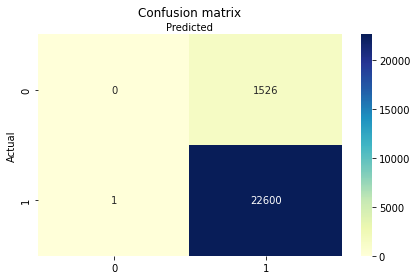

In [ ]:
#y_pred = logreg.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
print(y_train_pred)

[1 1 1 ... 1 1 1]


In [ ]:
y_test_pred = log_model.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_test,y_test_pred))
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
    0     1
0  0   501
1  1  7541


In [ ]:
print(y_test_pred)

[1 1 1 ... 1 1 1]


<Figure size 432x288 with 0 Axes>

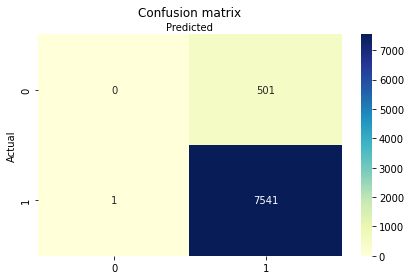

In [ ]:
#y_pred = logreg.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred, average='micro'))
print('Recall :', recall_score(y_test, y_test_pred, average='micro'))

Accuracy : 0.9375854780554519
Precision: 0.9375854780554519
Recall : 0.9375854780554519


In [ ]:
#OUTPUT USD
final_train = pd.DataFrame()
final_train = X_train.assign()

In [ ]:
print(final_train.head())
print(final_train.shape)

       Customer_no  Item_no  ...  Count_Transaction  Year_Diff
926         100051   100122  ...                  1          0
8909        100479   100686  ...                  1          0
18564       100574   100985  ...                  6          1
11035       100495   101077  ...                  1          0
4044        100210   100085  ...                  2          0

[5 rows x 5 columns]
(24127, 5)


In [ ]:
output_usd = final_train.assign(churn_pred = y_train_pred)

In [ ]:
output_usd.head()

,Customer_no,Item_no,AVG_Transaction_Amount,Count_Transaction,Year_Diff,churn_pred
926,100051,100122,8.631820e+05,1,0,1
8909,100479,100686,2.720455e+06,1,0,1
18564,100574,100985,2.956063e+05,6,1,1
11035,100495,101077,9.396818e+06,1,0,1
4044,100210,100085,7.427270e+05,2,0,1


In [ ]:
#output_usd.to_csv('/content/drive/MyDrive/Business Decision Research/output_train_USD.csv')

In [ ]:
#OUTPUT TEST CSV
final_test = pd.DataFrame()
final_test = X_test.assign()

In [ ]:
output_usd_test = final_test.assign(churn_pred = y_test_pred)

In [ ]:
print(final_test.head())
print(final_test.shape)

       Customer_no  Item_no  ...  Count_Transaction  Year_Diff
29174       100751   100642  ...                  5          1
3106        100162   100039  ...                  1          0
28138       100729   100122  ...                  6          2
20087       100601   101018  ...                  1          0
16962       100554   100877  ...                  9          1

[5 rows x 5 columns]
(8043, 5)


In [ ]:
output_usd_test.head()

,Customer_no,Item_no,AVG_Transaction_Amount,Count_Transaction,Year_Diff,churn_pred
29174,100751,100642,1931818.200,5,1,1
3106,100162,100039,561818.000,1,0,1
28138,100729,100122,2237500.167,6,2,1
20087,100601,101018,7363636.000,1,0,1
16962,100554,100877,1191899.111,9,1,1


In [ ]:
frames = [output_usd, output_usd_test]

In [ ]:
result_usd = pd.concat(frames).drop_duplicates().reset_index(drop=True)

In [ ]:
result_usd.to_csv('/content/drive/MyDrive/Business Decision Research/output_usd.csv')

# KHI

In [ ]:
#Importing Data and Inspection
import pandas as pd

df_khi = pd.read_csv('/content/drive/My Drive/Business Decision Research/Input/BusinessDecRes_KHI.csv',sep=',')

print('Lima data teratas:')
print(df_khi.head())

print('\nInfo dataset:')
print(df_khi.info())

Lima data teratas:
   Customer_no  Item_no  ... AVG_Transaction_Amount Count_Transaction
0       100001   100001  ...               725000.0                 2
1       100001   100002  ...               946590.5                 2
2       100001   100003  ...              1295455.0                 1
3       100001   100005  ...              2454546.0                 1
4       100001   100006  ...              2909091.0                 1

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_no             2896 non-null   int64  
 1   Item_no                 2896 non-null   int64  
 2   Description             2896 non-null   object 
 3   Dept                    2896 non-null   object 
 4   First_Transaction       2896 non-null   object 
 5   Last_Transaction        2896 non-null   ob

In [ ]:
df_khi.head()

,Customer_no,Item_no,Description,Dept,First_Transaction,Last_Transaction,AVG_Transaction_Amount,Count_Transaction
0,100001,100001,KLASSEN BT.2022 T.SABIT CHR 64,JKT,12-04-2017,14-02-2018,725000.0,2
1,100001,100002,KLASSEN BT.2022 T.SABIT CHR 96,JKT,12-04-2017,14-02-2018,946590.5,2
2,100001,100003,KLASSEN BT.2022 T.SABIT GP 64,JKT,14-02-2018,14-02-2018,1295455.0,1
3,100001,100005,KLASSEN BT.2073 T.TZ 18-128,JKT,05-12-2017,05-12-2017,2454546.0,1
4,100001,100006,KLASSEN BT.2073 T.TZ 18-160,JKT,05-12-2017,05-12-2017,2909091.0,1


In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df_khi['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df_khi.loc[df_khi['Last_Transaction'] <= '30-06-2020', 'is_churn'] = True
df_khi.loc[df_khi['Last_Transaction'] > '30-06-2020', 'is_churn'] = False

print('Lima data teratas:')
print(df_khi.head())

print('\nInfo dataset:')
print(df_khi.info())

31-10-2018
Lima data teratas:
   Customer_no  Item_no  ... Count_Transaction is_churn
0       100001   100001  ...                 2     True
1       100001   100002  ...                 2     True
2       100001   100003  ...                 1     True
3       100001   100005  ...                 1     True
4       100001   100006  ...                 1     True

[5 rows x 9 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_no             2896 non-null   int64  
 1   Item_no                 2896 non-null   int64  
 2   Description             2896 non-null   object 
 3   Dept                    2896 non-null   object 
 4   First_Transaction       2896 non-null   object 
 5   Last_Transaction        2896 non-null   object 
 6   AVG_Transaction_Amount  2896 non-null   float64
 7   Count_Tra

In [ ]:
# Kolom First_Transaction
df_khi['First_Transaction'] = pd.to_datetime(df_khi['First_Transaction'])
# Kolom Last_Transaction
df_khi['Last_Transaction'] = pd.to_datetime(df_khi['Last_Transaction'])

print('Lima data teratas:')
print(df_khi.head())

Lima data teratas:
   Customer_no  Item_no  ... Count_Transaction is_churn
0       100001   100001  ...                 2     True
1       100001   100002  ...                 2     True
2       100001   100003  ...                 1     True
3       100001   100005  ...                 1     True
4       100001   100006  ...                 1     True

[5 rows x 9 columns]


In [ ]:
# Hapus kolom-kolom yang tidak diperlukan
#del df_khi['Item_no']
# Cetak lima data teratas
#print(df_khi.head())

   Customer_no                     Description  ... Count_Transaction is_churn
0       100001  KLASSEN BT.2022 T.SABIT CHR 64  ...                 2     True
1       100001  KLASSEN BT.2022 T.SABIT CHR 96  ...                 2     True
2       100001   KLASSEN BT.2022 T.SABIT GP 64  ...                 1     True
3       100001     KLASSEN BT.2073 T.TZ 18-128  ...                 1     True
4       100001     KLASSEN BT.2073 T.TZ 18-160  ...                 1     True

[5 rows x 8 columns]


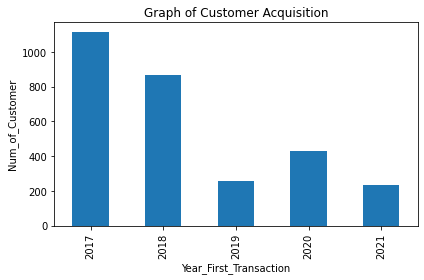

In [ ]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df_khi['Year_First_Transaction'] = df_khi['First_Transaction'].dt.year

# Kolom tahun transaksi terakhir
df_khi['Year_Last_Transaction'] = df_khi['Last_Transaction'].dt.year
df_year = df_khi.groupby(['Year_First_Transaction'])['Customer_no'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

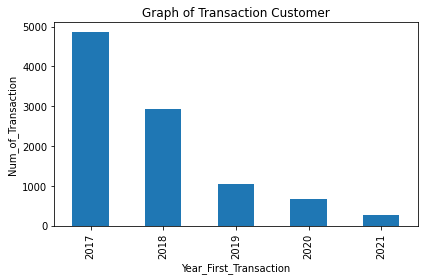

In [ ]:
#Transaction by Year
import matplotlib.pyplot as plt
plt.clf()
df_year = df_khi.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

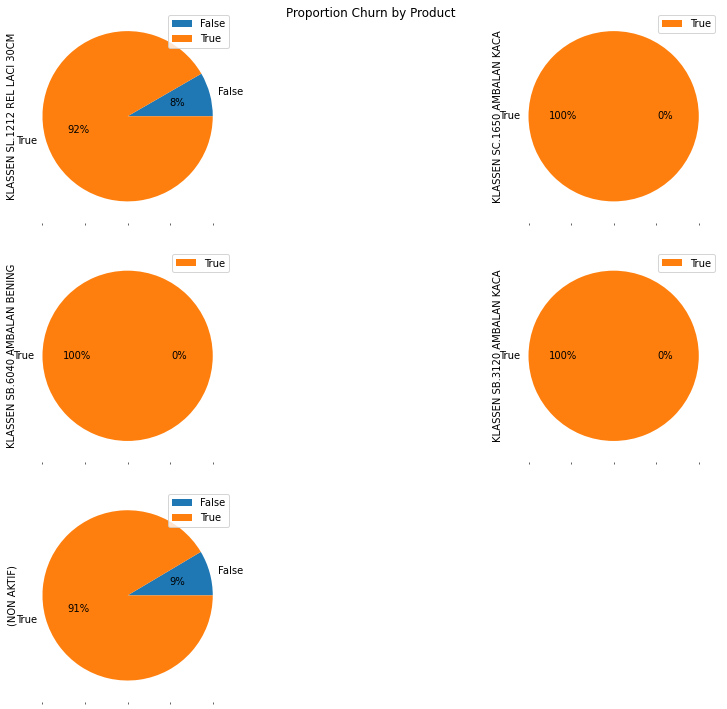

In [ ]:
import matplotlib.pyplot as plt
plt.clf()

# Melakukan pivot data
df_piv = df_khi.pivot_table(index='is_churn',
						columns='Description',
						values='Customer_no',
						aggfunc='count',
						fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).tail(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
				figsize=(15, 10),
				layout=(-1, 2),
				autopct='%1.0f%%',
				title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

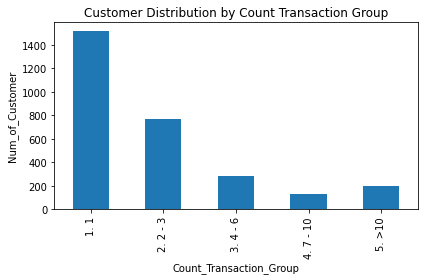

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1. 1'
	elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
		val ='2. 2 - 3'
	elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
		val ='3. 4 - 6'
	elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
		val ='4. 7 - 10'
	else:
		val ='5. >10'
	return val
# Tambahkan kolom baru
df_khi['Count_Transaction_Group'] = df_khi.apply(func, axis=1)
df_year = df_khi.groupby(['Count_Transaction_Group'])['Customer_no'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

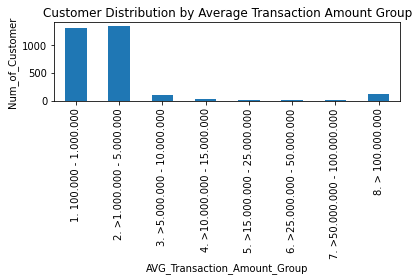

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
	if (row['AVG_Transaction_Amount'] >= 100000 and row['AVG_Transaction_Amount'] <=1000000):
		val ='1. 100.000 - 1.000.000'
	elif (row['AVG_Transaction_Amount'] >1000000 and row['AVG_Transaction_Amount'] <= 5000000):
		val ='2. >1.000.000 - 5.000.000'
	elif (row['AVG_Transaction_Amount'] >5000000 and row['AVG_Transaction_Amount'] <= 10000000):
		val ='3. >5.000.000 - 10.000.000'
	elif (row['AVG_Transaction_Amount'] >10000000 and row['AVG_Transaction_Amount'] <= 15000000):
		val ='4. >10.000.000 - 15.000.000'
	elif (row['AVG_Transaction_Amount'] >15000000 and row['AVG_Transaction_Amount'] <= 25000000):
		val ='5. >15.000.000 - 25.000.000'
	elif (row['AVG_Transaction_Amount'] >25000000 and row['AVG_Transaction_Amount'] <= 50000000):
		val ='6. >25.000.000 - 50.000.000'
	elif (row['AVG_Transaction_Amount'] >50000000 and row['AVG_Transaction_Amount'] <= 100000000):
		val ='7. >50.000.000 - 100.000.000'
	else:
		val ='8. > 100.000.000'
	return val

# Tambahkan kolom baru
df_khi['AVG_Transaction_Amount_Group'] = df_khi.apply(f, axis=1)
df_year = df_khi.groupby(['AVG_Transaction_Amount_Group'])['Customer_no'].count()
df_year.plot(x='AVG_Transaction_Amount_Group', y='Customer_no',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('AVG_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [ ]:
# Feature column: Year_Diff
df_khi['Year_Diff']=df_khi['Year_Last_Transaction'] - df_khi['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['AVG_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df_khi[feature_columns]  

# Target variable
print(df_khi[df_khi['is_churn'].isnull()])
df_khi['is_churn'] = pd.to_numeric(df_khi['is_churn'], errors='coerce')
df_khi = df_khi.dropna(subset=['is_churn'])
df_khi['is_churn'] = df_khi['is_churn'].astype(int)
y = df_khi['is_churn']

Empty DataFrame
Columns: [Customer_no, Item_no, Description, Dept, First_Transaction, Last_Transaction, AVG_Transaction_Amount, Count_Transaction, is_churn, Year_First_Transaction, Year_Last_Transaction, Count_Transaction_Group, AVG_Transaction_Amount_Group, Year_Diff]
Index: []


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print(y_test)

2309    1
1323    1
22      1
1005    1
248     1
       ..
2870    1
232     1
610     1
1355    1
2845    1
Name: is_churn, Length: 724, dtype: int64


In [ ]:
print(X_test)

      AVG_Transaction_Amount  Count_Transaction  Year_Diff
2309               72000.000                  1          0
1323             2727273.000                  1          0
22                454546.000                  1          0
1005              659091.000                  2          4
248              1169467.075                 40          2
...                      ...                ...        ...
2870             1265455.000                  1          0
232              1579039.750                 16          1
610               681818.000                  1          0
1355              536363.000                  1          0
2845              518182.000                  1          0

[724 rows x 3 columns]


In [ ]:
#Train, predict dan evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
log_model=logreg.fit(X_train, y_train)

# Predict model
y_train_pred = log_model.predict(X_train)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_train,y_train_pred))
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
    0     1
0  0    90
1  0  2082


<Figure size 432x288 with 0 Axes>

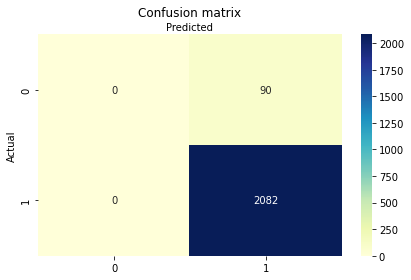

In [ ]:
#y_pred = logreg.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
print(y_train_pred)

[1 1 1 ... 1 1 1]


In [ ]:
y_test_pred = log_model.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_test,y_test_pred))
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
    0    1
0  0   34
1  0  690


In [ ]:
print(y_test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

<Figure size 432x288 with 0 Axes>

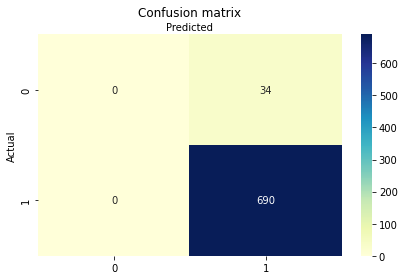

In [ ]:
#y_pred = logreg.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
print(y_train_pred)

[1 1 1 ... 1 1 1]


In [ ]:
y_test_pred = log_model.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = pd.DataFrame(confusion_matrix(y_test,y_test_pred))
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
    0    1
0  0   34
1  0  690


In [ ]:
print(y_test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

<Figure size 432x288 with 0 Axes>

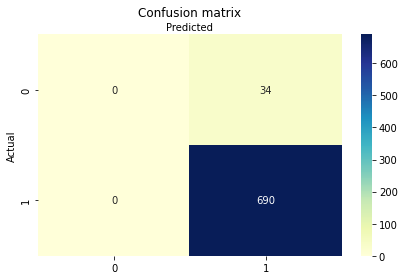

In [ ]:
#y_pred = logreg.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred, average='micro'))
print('Recall :', recall_score(y_test, y_test_pred, average='micro'))

Accuracy : 0.9530386740331491
Precision: 0.9530386740331491
Recall : 0.9530386740331491


In [ ]:
#OUTPUT CSV KHI
final_train = pd.DataFrame()
final_train = X_train.assign()

In [ ]:
print(final_train.head())
print(final_train.shape)

      AVG_Transaction_Amount  Count_Transaction  Year_Diff
2839             3818182.000                  1          0
1462             3340908.750                  4          1
653              2012121.000                  3          1
1362             4641558.429                  7          3
2539              196364.000                  1          0
(2172, 3)


In [ ]:
output_khi= final_train.assign(churn_pred = y_train_pred)

In [ ]:
output_khi.head(50)

,AVG_Transaction_Amount,Count_Transaction,Year_Diff,churn_pred
2839,3.818182e+06,1,0,1
1462,3.340909e+06,4,1,1
653,2.012121e+06,3,1,1
1362,4.641558e+06,7,3,1
2539,1.963640e+05,1,0,1
676,8.727270e+05,1,0,1
1370,6.909090e+05,2,0,1
934,2.590909e+06,2,0,1
1025,1.545460e+05,1,0,1
2422,8.981818e+05,6,1,1


In [ ]:
#output_khi.to_csv('/content/drive/MyDrive/Business Decision Research/output_train_KHI.csv')

In [ ]:
#OUTPUT TEST CSV
final_test = pd.DataFrame()
final_test = X_test.assign()

In [ ]:
output_khi_test = final_test.assign(churn_pred = y_test_pred)

In [ ]:
print(final_test.head())
print(final_test.shape)

      AVG_Transaction_Amount  Count_Transaction  Year_Diff
2309               72000.000                  1          0
1323             2727273.000                  1          0
22                454546.000                  1          0
1005              659091.000                  2          4
248              1169467.075                 40          2
(724, 3)


In [ ]:
output_khi_test.head()

,AVG_Transaction_Amount,Count_Transaction,Year_Diff,churn_pred
2309,72000.000,1,0,1
1323,2727273.000,1,0,1
22,454546.000,1,0,1
1005,659091.000,2,4,1
248,1169467.075,40,2,1


In [ ]:
frames = [output_khi, output_khi_test]

In [ ]:
result_khi = pd.concat(frames).drop_duplicates().reset_index(drop=True)

In [ ]:
result_khi.to_csv('/content/drive/MyDrive/Business Decision Research/output_khi.csv')